<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Question-1:" data-toc-modified-id="Question-1:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong><em>Question 1:</em></strong></a></span><ul class="toc-item"><li><span><a href="#Int2Dec(n)" data-toc-modified-id="Int2Dec(n)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong><em>Int2Dec(n)</em></strong></a></span></li><li><span><a href="#Frac2Dec(n)" data-toc-modified-id="Frac2Dec(n)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Frac2Dec(n)</a></span></li><li><span><a href="#Num2Dec(n)" data-toc-modified-id="Num2Dec(n)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Num2Dec(n)</a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong><em>Question 2</em></strong></a></span></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong><em>Question 3</em></strong></a></span></li><li><span><a href="#Question-4" data-toc-modified-id="Question-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong><em>Question 4</em></strong></a></span></li></ul></div>

In [1]:
library(tidyverse) 
library(Matrix) 
library(reshape2) 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



## ***Question 1:*** 

Write a function in R to convert a decimal (base 10) to binary number.  Please extend the code we started in class to handle fractional numbers (e.g., 200.65). 
****
*Extend the code to handle fractional numbers* 

### ***Int2Dec(n)***

Start by writing a function that converts integers 
to binary 

In [2]:
## for integer 

Int2Dec <- function(n) {
    
    n <- floor(n) ## Make sure it's just an integer
    
    ## Start by defining an empty matrix 
    b <- c() 
    while(n > 0){
        ## Define a while loop 
        ## divide n / 2 and take the remainder
        ## Append the remainder into matrix
        ## until the value of n = 0 
        
        
        n_rem <-  n %% 2  ## Take the remainder
        n <- floor(n / 2 ) ## Divide by 2 and take only the int part
        
        b <- append(b, n_rem) ## append the remainder 
    }
    
    ## Reverse the order of the matrix for it 
    ## to become a binary number 
    b <- rev(b) 
    b <- paste(b, collapse = '') 
    return(b) 
}

print(Int2Dec(28) ) 

[1] "11100"


### Frac2Dec(n)

Create a function that takes the fractional part and converts to binary

In [3]:


Frac2Dec <- function(n){
    ## Make sure we are only taking the
    ## binary of the decimal
    n <- n - floor(n) 
    b <- c() 
    while(n > 0){
        n = n * 2  ## Multiply number by 2 
        n_int <- floor(n) ## extract the integer part of the number
        n <- n - n_int ## extract the decimal part of the number
        b <- append(b, n_int) 
        b <- paste(b, collapse = '') 
    }
    return(b) 
}

Frac2Dec(0.23)

[1] "0011101011100001010001111010111000010100011110101110001"

### Num2Dec(n)

Combine the integer binary and decimal binary together to create one full binary number 

In [4]:
Num2Dec <- function(n){
    int_n <- Int2Dec(n) ## Integer of n 
    frac_n <- Frac2Dec(n) ## Fraction of n 
    
    ## Put the int and frac in one vector 
    num <- c(int_n,'.', frac_n)
    
    ## Combine them together as a single number 
    num <- (paste(num, collapse = ''))  
   
    
    return(num) 
    
}
a <- Num2Dec(28.23) 
print(a) 


[1] "11100.001110101110000101000111101011100001010001111011"


## ***Question 2*** 

Using R, confirm that the LU factorization out-performs R’s Gaussian elimination (x = A\b) procedure in terms of speed for the following system of equations:

[4 2 3; 5 -8 1; 4 7 -9]

[1 4 0]

In [5]:
## Define the orignal matrix
A <- matrix(c(4, 2, 3, 
             5, -8, 1, 
             4, 7, -9), ncol = 3, byrow = T) 
b <- matrix(c(1, 4, 0), ncol = 1) 



In [6]:
native_time <- c() 
n <- seq.int(from = 1, to = 1000, by = 1) 

for(num in n){
    t <- proc.time()

    for(i in 1:num){
        solve(A, b) 
    }
    t <- proc.time() - t 
    native_time <- append(native_time, t[3]) 
}


lu_time <- c() 
for(num in n){
    t0 <- proc.time() 
    ## Implement the LU factorization
    LU <- Matrix::expand(lu(A))  
    P <- LU$P 
    U <- LU$U
    L <- LU$L
    for(j in 1:num){
        x <- solve(U, solve(L, solve(P, b))) 
    }
    t1 <- proc.time() - t0 
    lu_time <- append(lu_time, t1[3]) 
}

timeit <- tibble(n = n, native_time = native_time, lu_time = lu_time)  

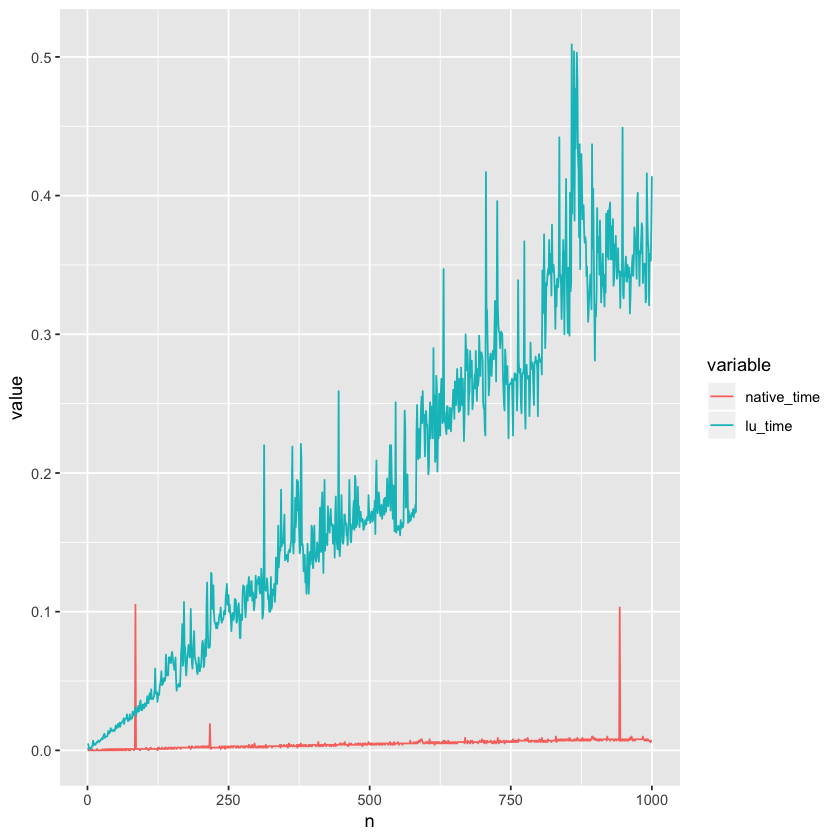

In [7]:
ggplot(data = melt(timeit, id.var = 'n'), 
      aes(x = n, y = value, col = variable)) + 
    geom_line()

In [8]:
library(Matrix) 
A_1 <- matrix(c(3, 1, 1, 0, 
             1, 5, -1, 2, 
             1, 0, 3, 1, 
             0, 1, 1, 4), 
             byrow = T, 
             ncol = 4)  

A_2 <- matrix(c(2.5, 1, 1, 0, 
               1, 4.1, -1, 2, 
               1, 0, 2.1, 1, 
               0, 1, 1, 2.1), byrow = T, ncol = 4) 

A_3 <- matrix(c(2, 1, 1, 0, 
               1, 3.5, -1, 2, 
               1, 0, 2.1, 1, 
               0, 1, 1, 2.1), byrow = T, ncol = 4) 

b_1 = matrix(c(1, 4, -2, 1), ncol = 1) 

b_2 <- b_1 

b_3 <- b_2 


## ***Question 3*** 

Write an R function to solve the following system of equations using the Gauss Seidel Method. 
Make sure it outputs a warning message if the system does not converge. 


A1 = [3 1 1 0; 1 5 -1 2; 1 0 3 1; 0 1 1 4];

A2 = [2.5 1 1 0; 1 4.1 -1 2; 1 0 2.1 1; 0 1 1 2.1];

A3 = [2 1 1 0; 1 3.5 -1 2; 1 0 2.1 1; 0 1 1 2.1];

b1 = b2 = b3 = [1 4 -2 1]; 

In [9]:

## Function followed along from in class R vignette. 
myJacobi <- function(A,b,x0,tol=1e-8,maxN=200){
    # Decompose A:
    D <- diag(diag(A))
    C <- A - D
    n <- length(x0)
    # Check for convergence:
    B <- -solve(D)%*%(C)
    rho <- max(abs(eigen(B)$values))
    if (rho >= 1){
        warning("May not converge!")
    }
    # It's generally good practice to take the repeated calculations outside of
    # the loop whenever possible
    Dinvb <- solve(D,b)
    DinvC <- -solve(D,C)
    # Generate a data frame for output statistics:
    outstats <- as.data.frame(matrix(rep(NA,(2+n)*maxN),nrow=maxN))
    names(outstats)[c(1:2)] <- c("Iter","Convergence")
    # The main loop:
    for (i in 1:maxN) {
        x <- DinvC %*% x0 + Dinvb
        outstats[i,] <- matrix(c(i,norm(x - x0)/norm(x0),t(x)),nrow=1)
        if (norm(x - x0) < tol*norm(x0)){
        results <- list("x"=x,"outstats"=outstats,"rho"=rho,"iter"=i)
        return(results)
        break
        }
        x0 <- x
    }
    results <- list("x"=x,"outstats"=outstats,"rho"=rho,"iter"=i)
    return(results)
}



In [10]:
a_1_jacobi <- myJacobi(A_1, b_1, x0 = matrix(c(0, 0, 0, 0)))
a_1_jacobi$x

a_2_jacobi <- myJacobi(A_2, b_2, x0 = matrix(c(0, 0, 0, 0)))
a_2_jacobi$x

a_3_jacobi <- myJacobi(A_3, b_3, x0 = matrix(c(0, 0, 0, 0)))
a_3_jacobi$x




0.5555555
0.3240741
-0.9907407
0.4166667


3.199560
-2.709110
-4.289791
3.809000


Warning message in myJacobi(A_3, b_3, x0 = matrix(c(0, 0, 0, 0))):
“May not converge!”

96.49745
-103.73554
-89.90574
91.90233


## ***Question 4*** 

Write an R function to solve the above systems of equations using the Gauss-Seidel iterative method discussed in class.  The code should check to ensure the system will converge and if not, it should report an error message.

In [12]:
myGauss <- function(A,b,x0,tol=1e-8,maxN=200){
# Decompose A:
n <- length(x0)
D <- lower.tri(A,diag=TRUE)*A
C <- A - D
# It's generally good practice to take the repeated calculations outside of
# the loop whenever possible
Dinvb <- solve(D,b)
DinvC <- -solve(D,C)
    
# Check for convergence:
B <- -solve(D)%*%(C)
rho <- max(abs(eigen(B)$values))
if (rho >= 1){
    warning("May not converge!")
}
    
# Generate a data frame for output statistics:
# The main loop:
for (i in 1:maxN) {
x1 <- DinvC %*% x0 + Dinvb
if (norm(x1 - x0) < tol*norm(x0)){
results <- list("x"=x1,"iter"=i)
return(results)
break
}
x0 <- x1
}
results <- list("x"=x1,"iter"=i)
return(results) 
    }

a_1_gauss <- myGauss(A_1, b_1, x0 = matrix(c(0, 0, 0, 0)))
a_1_gauss$x 

a_2_gauss <- myGauss(A_2, b_2, x0 = matrix(c(0, 0, 0, 0)))
a_2_gauss$x 

a_3_gauss <- myGauss(A_3, b_3, x0 = matrix(c(0, 0, 0, 0)))
a_3_gauss$x 

0.5555556
0.3240741
-0.9907407
0.4166667


3.199561
-2.709111
-4.289791
3.809001


Warning message in myGauss(A_3, b_3, x0 = matrix(c(0, 0, 0, 0))):
“May not converge!”

348.5764
-379.8682
-325.0257
336.1400
